In [640]:
import numpy as np
from matplotlib import pyplot as plt

from qutrit_rpe import *

%load_ext autoreload 
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [641]:
xvec = random_error_vector(0.0, 0.001)
qids = ['Q0', 'Q1']
depol_rates = [0.00, 0.0] # 1 and 2 qubit depolarizing rates

In [642]:
parse_error_vector(xvec, qids)

{'single_qutrit': {'Q0': {'X01': 0.0,
   'phase01': 0.0,
   'X12': 0.0,
   'phase12': 0.0},
  'Q1': {'X01': 0.0, 'phase01': 0.0, 'X12': 0.0, 'phase12': 0.0}},
 'two_qutrit': {'phi1': 0.0030914265511525125,
  'phi2': 0.0299154725776668,
  'phi3': -0.030453059441540677,
  'phi4': -0.015081800462615312,
  'phi5': 0.005965621781468273,
  'phi6': -0.05940067333365303,
  'phi7': 0.03654326786332591,
  'phi8': 0.03244717592342049}}

In [643]:
target_model = make_two_qutrit_model(np.zeros(16), single_qutrit_depol=0.0, two_qutrit_depol=0.0, qids=qids)
noise_model = make_two_qutrit_model(xvec, single_qutrit_depol=depol_rates[0], two_qutrit_depol=depol_rates[1], qids=qids)

In [644]:
depths = [2**i for i in range(10)]
edesign0 = RPEDesign1QT(depths, qids[0], qids)
edesign1 = RPEDesign1QT(depths, qids[1], qids)

In [645]:
ds0_model = pygsti.data.simulate_data(noise_model, edesign0.circ_list, num_samples=1000)
ds0_target = pygsti.data.simulate_data(target_model, edesign0.circ_list, num_samples=1000)
ds1_target = pygsti.data.simulate_data(target_model, edesign1.circ_list, num_samples=1000)
ds1_model = pygsti.data.simulate_data(noise_model, edesign1.circ_list, num_samples=1000)

In [678]:
germ_quadrature_labels_Q1 = {
    'X01 overrot': {
        '+': ['00'],
        '-': ['01']
    },
    'Phase01' : {
        '+' : ['00'], 
        '-' : ['02']
    },
    'X12 overrot': {
        '+': ['01'],
        '-': ['02']
    },
    'Phase12' : {
        '+' : ['00'], 
        '-' : ['01']
    }}

germ_quadrature_labels_Q0 = {
    'X01 overrot': {
        '+': ['00'],
        '-': ['10']
    },
    'Phase01' : {
        '+' : ['00'], 
        '-' : ['20']
    },
    'X12 overrot': {
        '+': ['10'],
        '-': ['20']
    },
    'Phase12' : {
        '+' : ['00'], 
        '-' : ['10']
    }}

In [679]:
estimator0 = RPEEstimator1QT(ds0_model, edesign0, germ_quadrature_labels_Q0)
estimator1 = RPEEstimator1QT(ds1_model, edesign1, germ_quadrature_labels_Q1)

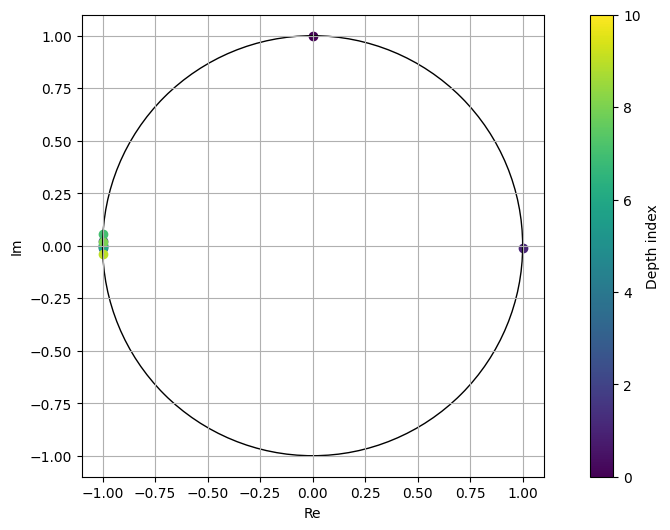

In [680]:
signals = estimator0.signals
estimator0.plot_signal_on_circle(signals['X01 overrot'])

In [650]:
print(estimator0.trig_last_good_gens)
print(estimator1.trig_last_good_gens)

{'Phase01': 9, 'Phase12': 9, 'X01 overrot': 9, 'X12 overrot': 9}
{'Phase01': 9, 'Phase12': 9, 'X01 overrot': 9, 'X12 overrot': 9}


In [651]:
print(estimator0.param_estimates)
print(estimator1.param_estimates)

{'Phase01': 2.0826226588166463e-05, 'Phase12': 6.510199665725007e-06, 'X01 overrot': -7.808337328807369e-05, 'X12 overrot': 7.812458334477412e-06}
{'Phase01': 1.6923270643509625e-05, 'Phase12': 5.2082222265307605e-06, 'X01 overrot': 0.0, 'X12 overrot': 2.7341963751759124e-05}


In [652]:
parse_error_vector(xvec)

{'single_qutrit': {'Q0': {'X01': 0.0,
   'phase01': 0.0,
   'X12': 0.0,
   'phase12': 0.0},
  'Q1': {'X01': 0.0, 'phase01': 0.0, 'X12': 0.0, 'phase12': 0.0}},
 'two_qutrit': {'phi1': 0.0030914265511525125,
  'phi2': 0.0299154725776668,
  'phi3': -0.030453059441540677,
  'phi4': -0.015081800462615312,
  'phi5': 0.005965621781468273,
  'phi6': -0.05940067333365303,
  'phi7': 0.03654326786332591,
  'phi8': 0.03244717592342049}}

# two qubit experiment

In [671]:
depths = [2**i for i in range(12)]
edesign2 = RPEDesign2QT(depths, qids)

In [672]:
ds2_model = pygsti.data.simulate_data(noise_model, edesign2.circ_list, num_samples=1000)
ds2_target = pygsti.data.simulate_data(target_model, edesign2.circ_list, num_samples=1000)

In [674]:
def add_phases(phase1, phase2):
  return (phase1 + phase2) % (2 * np.pi)

def subtract_phases(phase1, phase2):
  return (phase1 - phase2) % (2 * np.pi)

In [675]:
estimator2 = RPEEstimator2QT(ds2_model, edesign2, germ_quadrature_labels_2QT)

In [676]:
rectify_angle(estimator2.param_estimates)

array([ 0.00308163,  0.02994869, -0.03046474, -0.01509296,  0.00593509,
       -0.05942468,  0.03650695,  0.03243304])

In [677]:
parse_error_vector(xvec)['two_qutrit']

{'phi1': 0.0030914265511525125,
 'phi2': 0.0299154725776668,
 'phi3': -0.030453059441540677,
 'phi4': -0.015081800462615312,
 'phi5': 0.005965621781468273,
 'phi6': -0.05940067333365303,
 'phi7': 0.03654326786332591,
 'phi8': 0.03244717592342049}

In [660]:
target_phis = np.array([0, 0, 0, -2*np.pi/3, -4*np.pi/3, 0, -4*np.pi/3, -2*np.pi/3])
target_phis

array([ 0.       ,  0.       ,  0.       , -2.0943951, -4.1887902,
        0.       , -4.1887902, -2.0943951])

In [661]:
np.array([
            [1, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, -1, 1, 0, 0, 0, 0],
            [0, 0, -1, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, -1, 1, 0],
            [0, 0, 0, 0, 0, -1, 0, 1],
            [-1, 0, 0, 1, 0, 0, 0, 0],
            [-1, 0, 0, 0, 0, 0, 1, 0]
        ])@target_phis

array([ 0.       ,  0.       , -2.0943951, -4.1887902, -4.1887902,
       -2.0943951, -2.0943951, -4.1887902])

In [662]:
estimator2.raw_estimates

array([6.28056313, 6.25319557, 2.0790475 , 4.15234211, 4.09251463,
       2.00268453, 2.11295734, 4.15544   ])

In [663]:
target_phis

array([ 0.       ,  0.       ,  0.       , -2.0943951, -4.1887902,
        0.       , -4.1887902, -2.0943951])

In [664]:
np.linalg.inv(np.array([
            [1, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, -1, 1, 0, 0, 0, 0],
            [0, 0, -1, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, -1, 1, 0],
            [0, 0, 0, 0, 0, -1, 0, 1],
            [-1, 0, 0, 1, 0, 0, 0, 0],
            [-1, 0, 0, 0, 0, 0, 1, 0]
        ]))

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -0., -1., -0., -0., -0.,  1., -0.],
       [ 1., -0., -0., -0., -0., -0.,  1., -0.],
       [ 1.,  0., -1.,  1.,  0.,  0.,  1.,  0.],
       [ 1., -0., -0., -0., -1., -0., -0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0., -1.,  1.,  0.,  1.]])

In [665]:
target_phis = np.array([0, 0, 0, -2*np.pi/3, -4*np.pi/3, 0, -2*np.pi/3, -4*np.pi/3])

In [666]:
rectify_angle(target_phis)

array([ 0.       ,  0.       ,  0.       , -2.0943951,  2.0943951,
        0.       , -2.0943951,  2.0943951])

In [667]:
list(estimator2.raw_trig_estimates.keys())

['theta1',
 'theta2',
 'theta3',
 'theta4',
 'theta5',
 'theta6',
 'theta7',
 'theta8']

In [668]:
print(estimator2.raw_trig_estimates)

{'theta1': array([1.99999733e-03, 6.26519308e+00, 6.27868579e+00, 6.28118548e+00,
       6.28093178e+00, 6.27970636e+00, 6.28018032e+00, 6.28056313e+00]), 'theta2': array([6.22724374, 6.25810596, 6.25067366, 6.25262362, 6.25110704,
       6.25309826, 6.25362426, 6.25319557]), 'theta3': array([2.09857605, 2.09316128, 2.0800629 , 2.07049388, 2.08083745,
       2.0785048 , 2.07913693, 2.0790475 ]), 'theta4': array([4.12602482, 4.17110363, 4.15336754, 4.15677322, 4.15405867,
       4.15203492, 4.15228914, 4.15234211]), 'theta5': array([4.10045633, 4.10730423, 4.09637092, 4.08999317, 4.09022787,
       4.09176834, 4.09384075, 4.09251463]), 'theta6': array([1.98881761, 1.99573187, 2.00395477, 2.00031102, 2.00246439,
       2.00313998, 2.00204955, 2.00268453]), 'theta7': array([2.0571673 , 2.08926553, 2.12195336, 2.118087  , 2.11180495,
       2.11306586, 2.1127045 , 2.11295734]), 'theta8': array([4.1625358 , 4.16502548, 4.1583116 , 4.14910778, 4.15498672,
       4.15519267, 4.15499088, 4.155

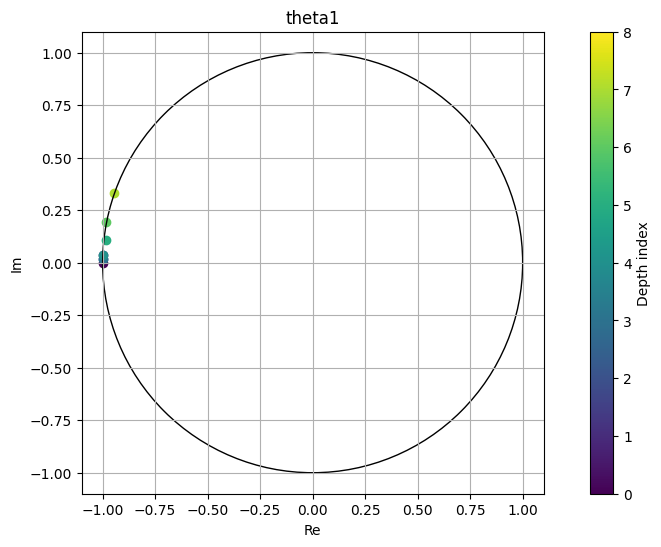

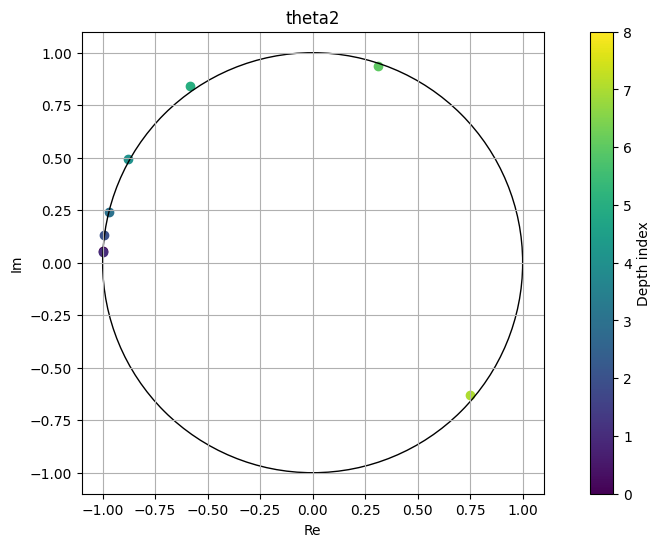

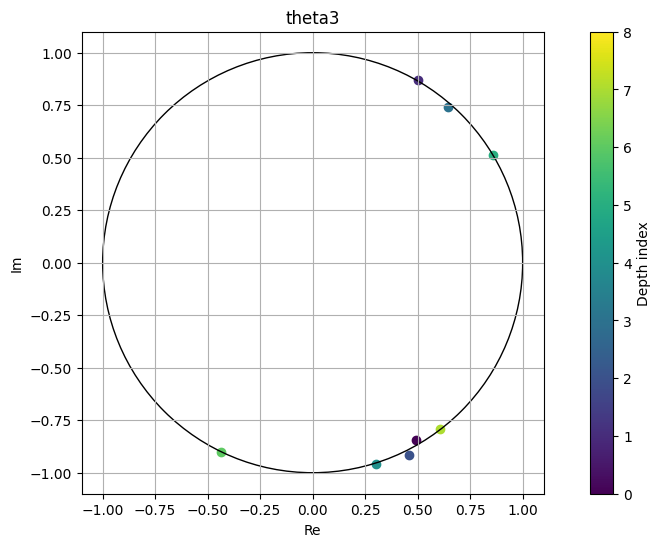

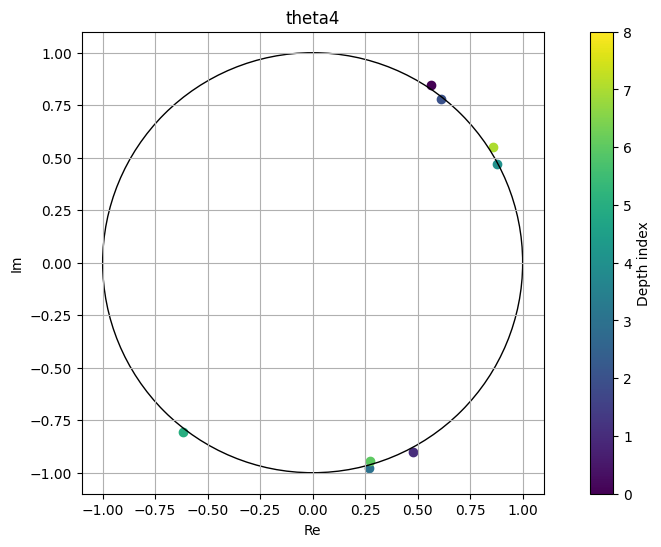

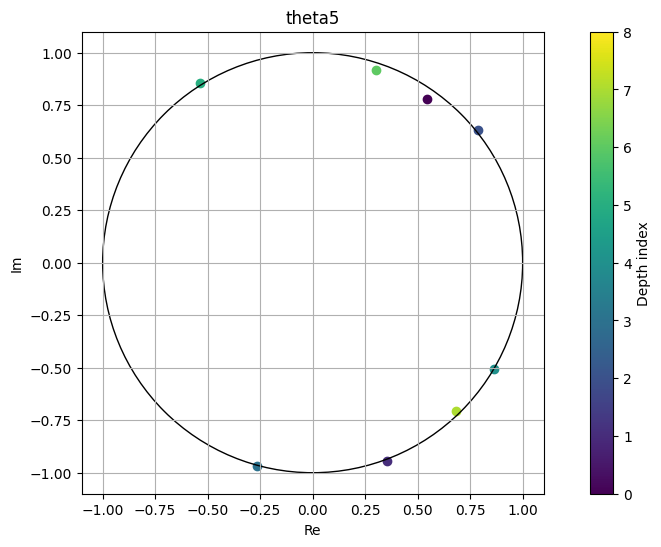

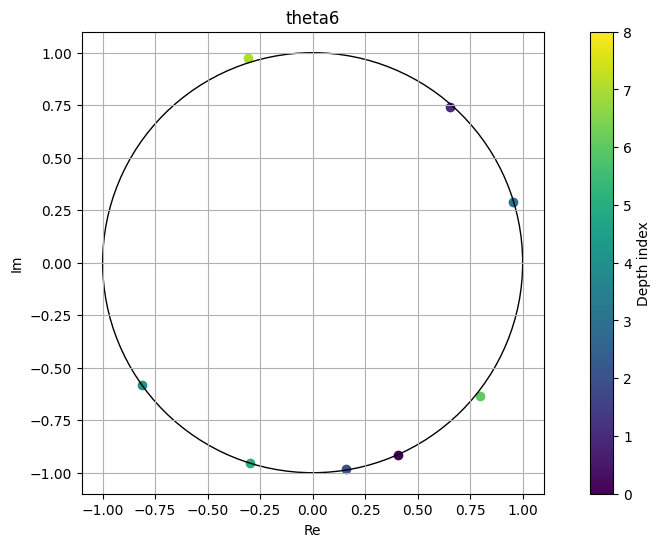

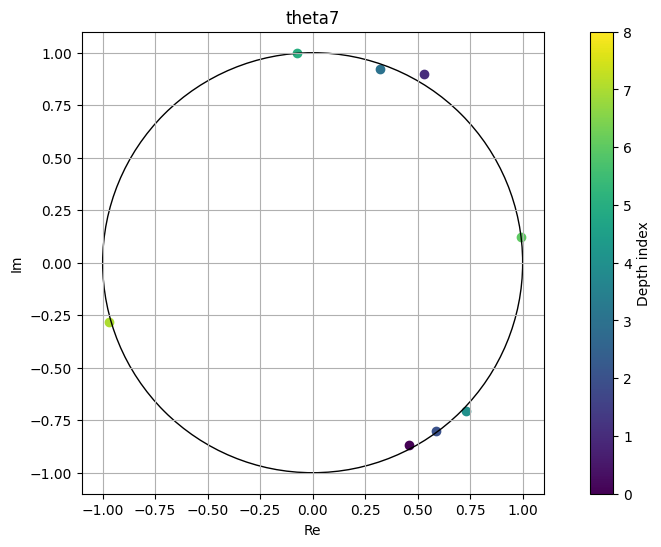

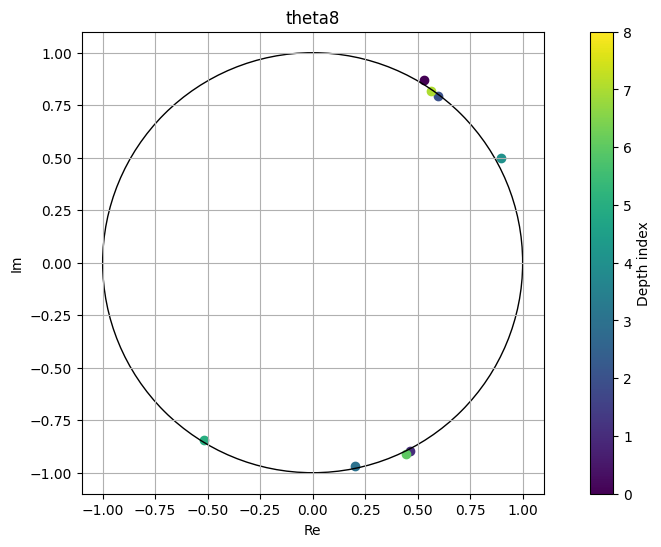

In [669]:
estimator2.plot_all_signals()

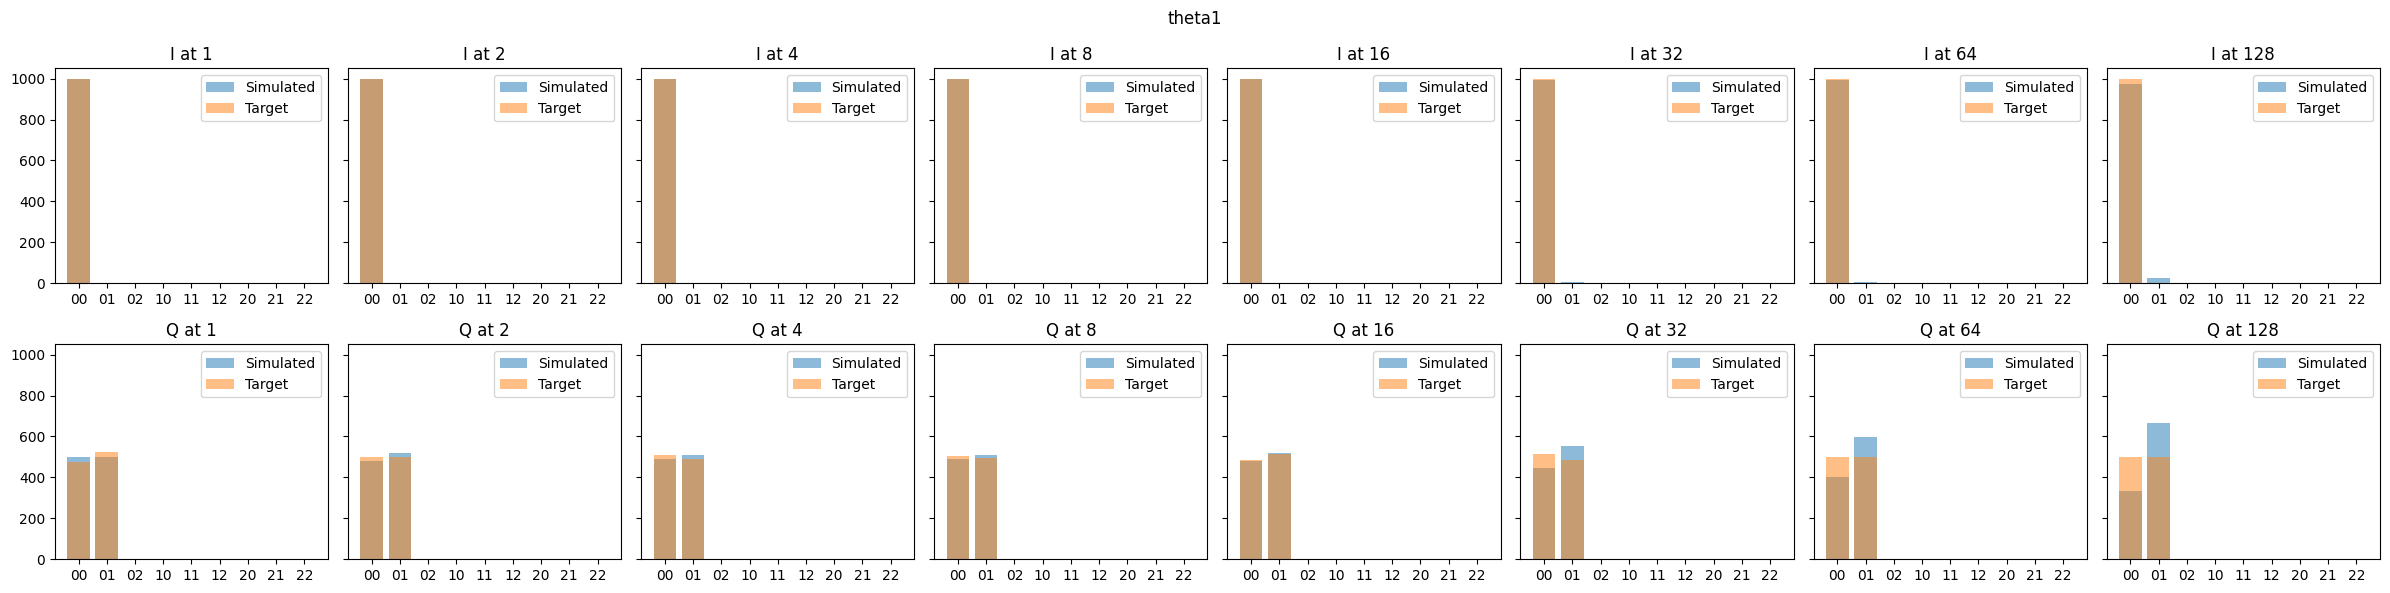

<Figure size 640x480 with 0 Axes>

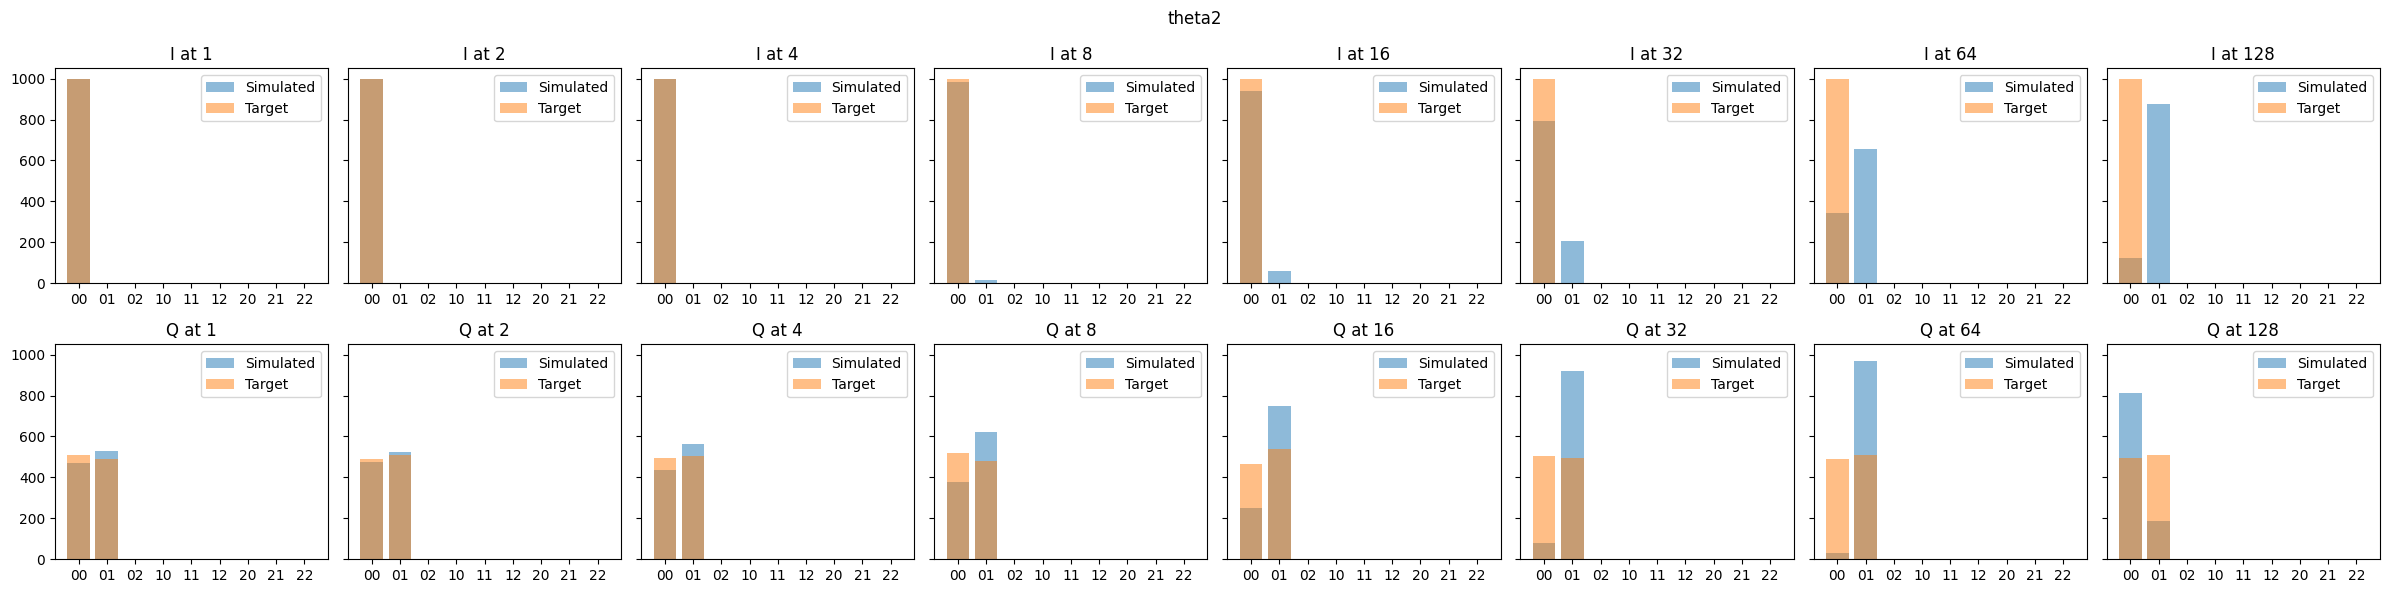

<Figure size 640x480 with 0 Axes>

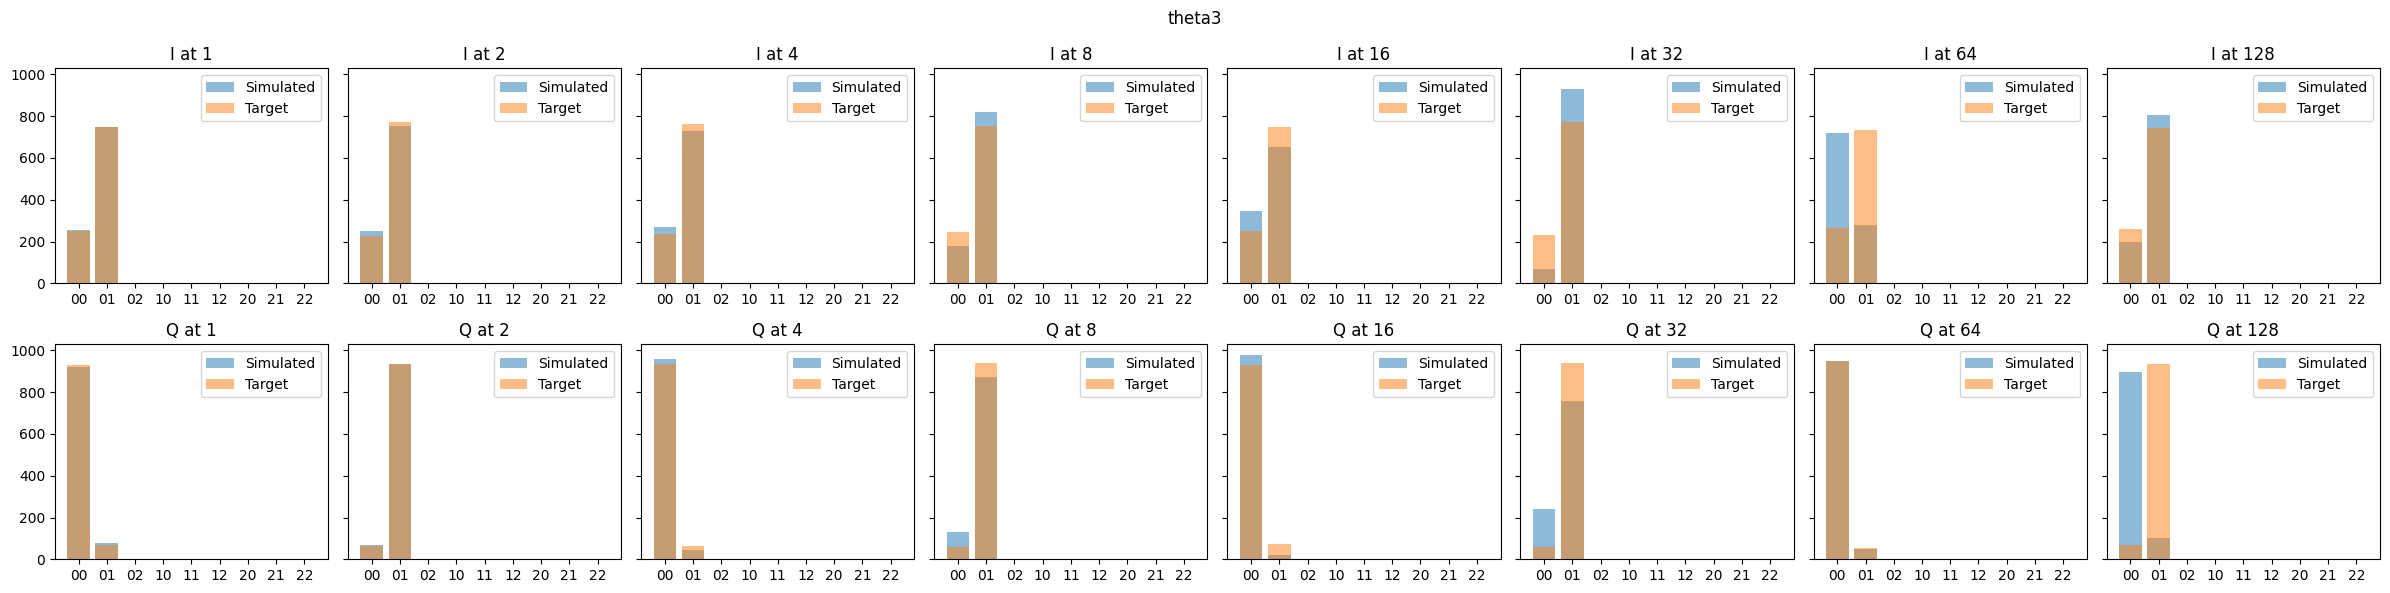

<Figure size 640x480 with 0 Axes>

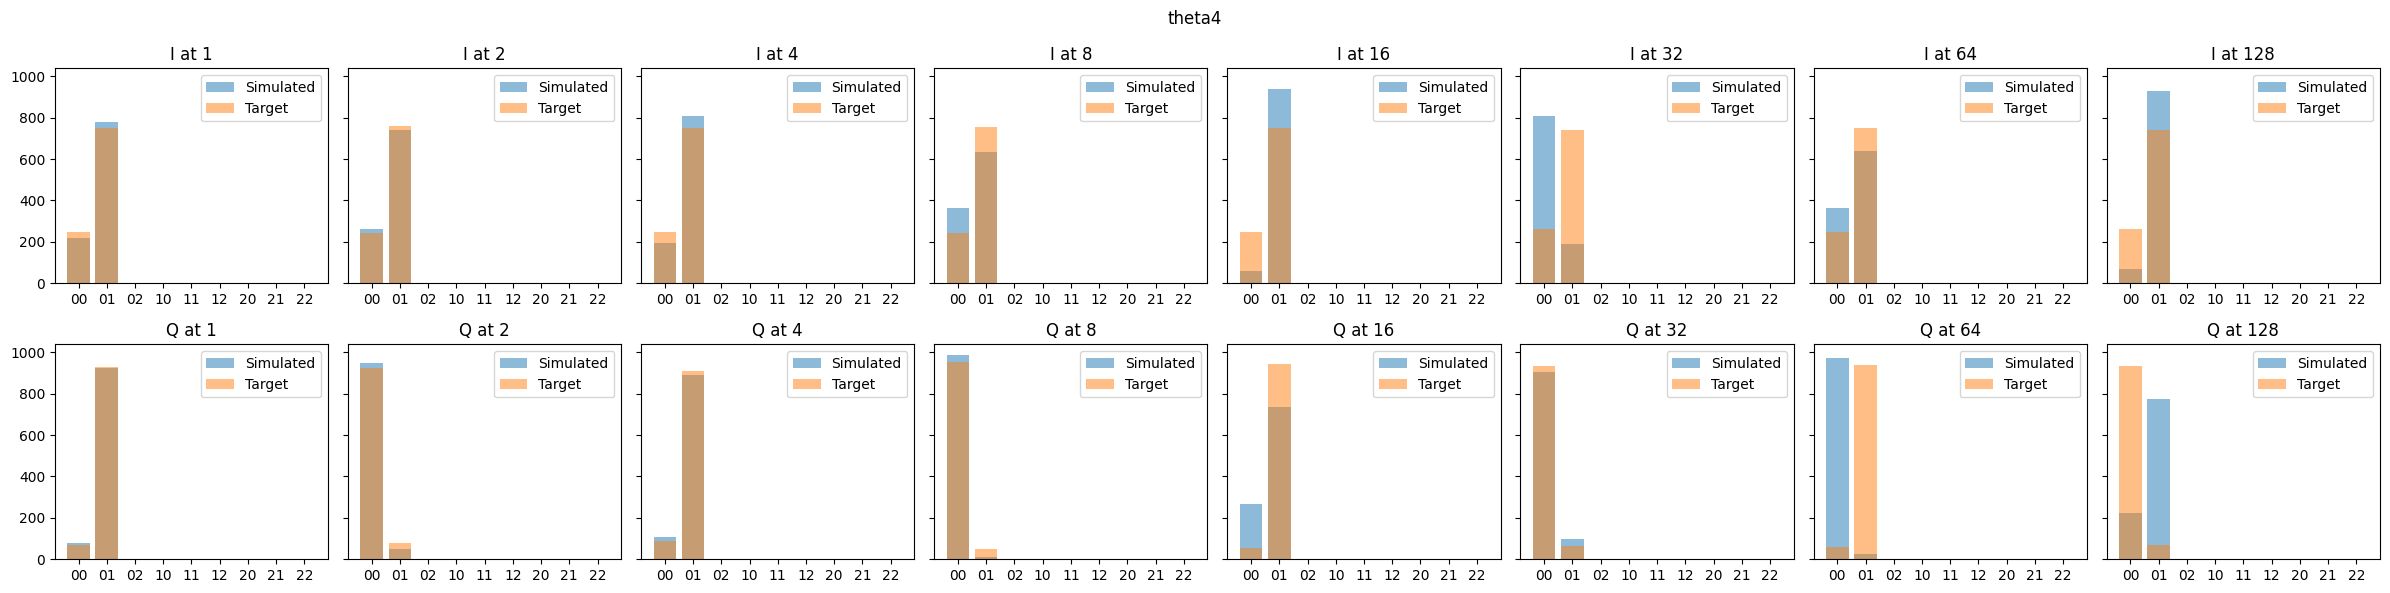

<Figure size 640x480 with 0 Axes>

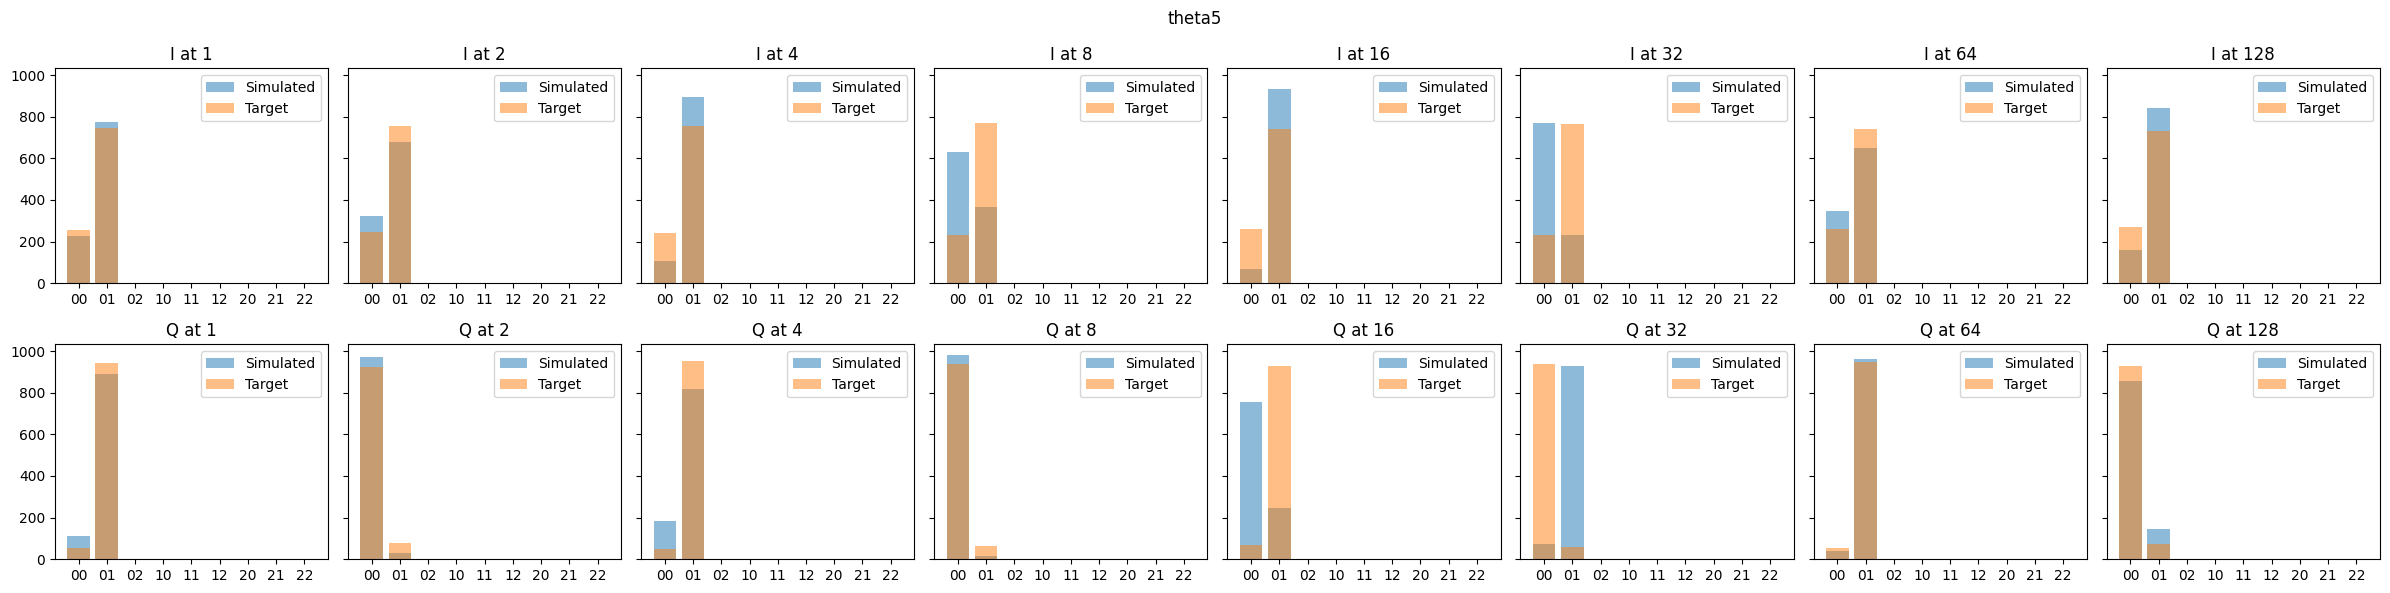

<Figure size 640x480 with 0 Axes>

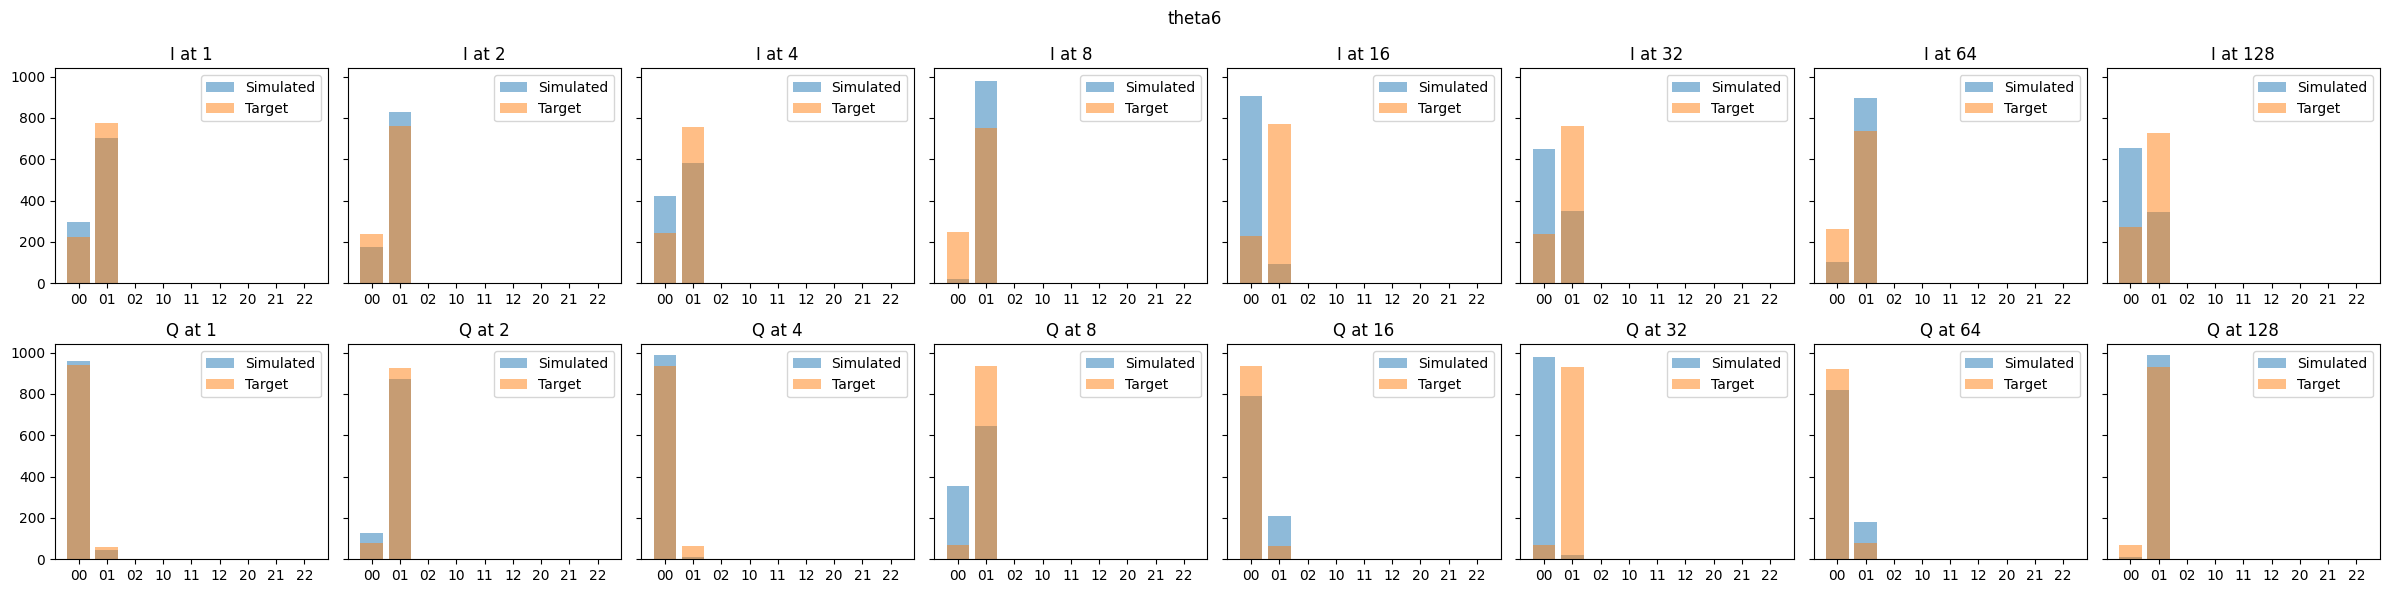

<Figure size 640x480 with 0 Axes>

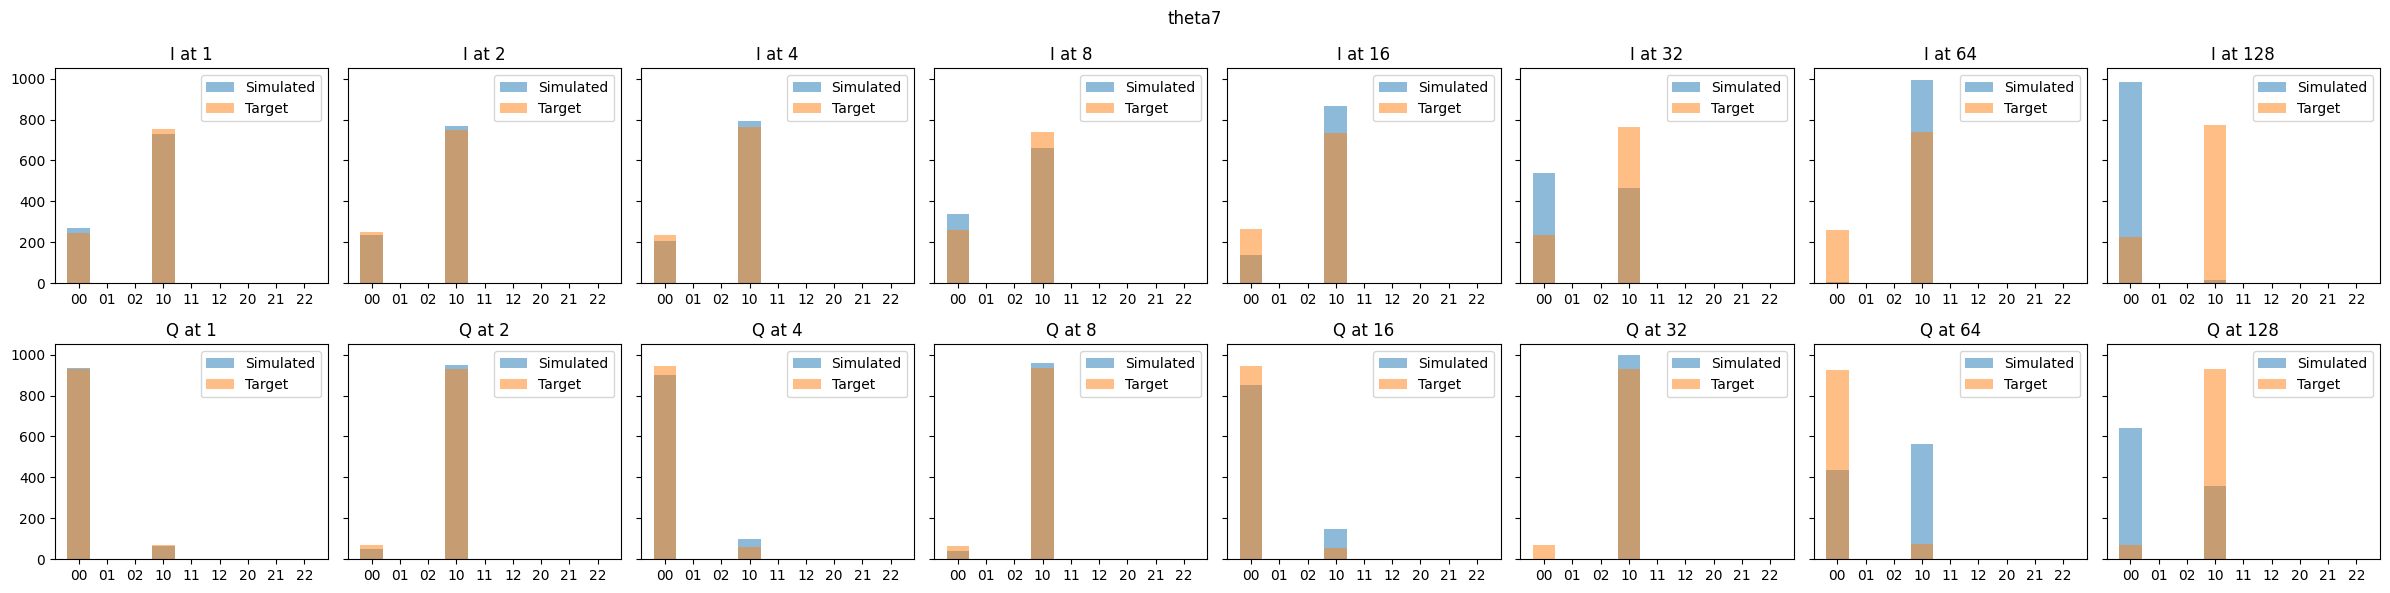

<Figure size 640x480 with 0 Axes>

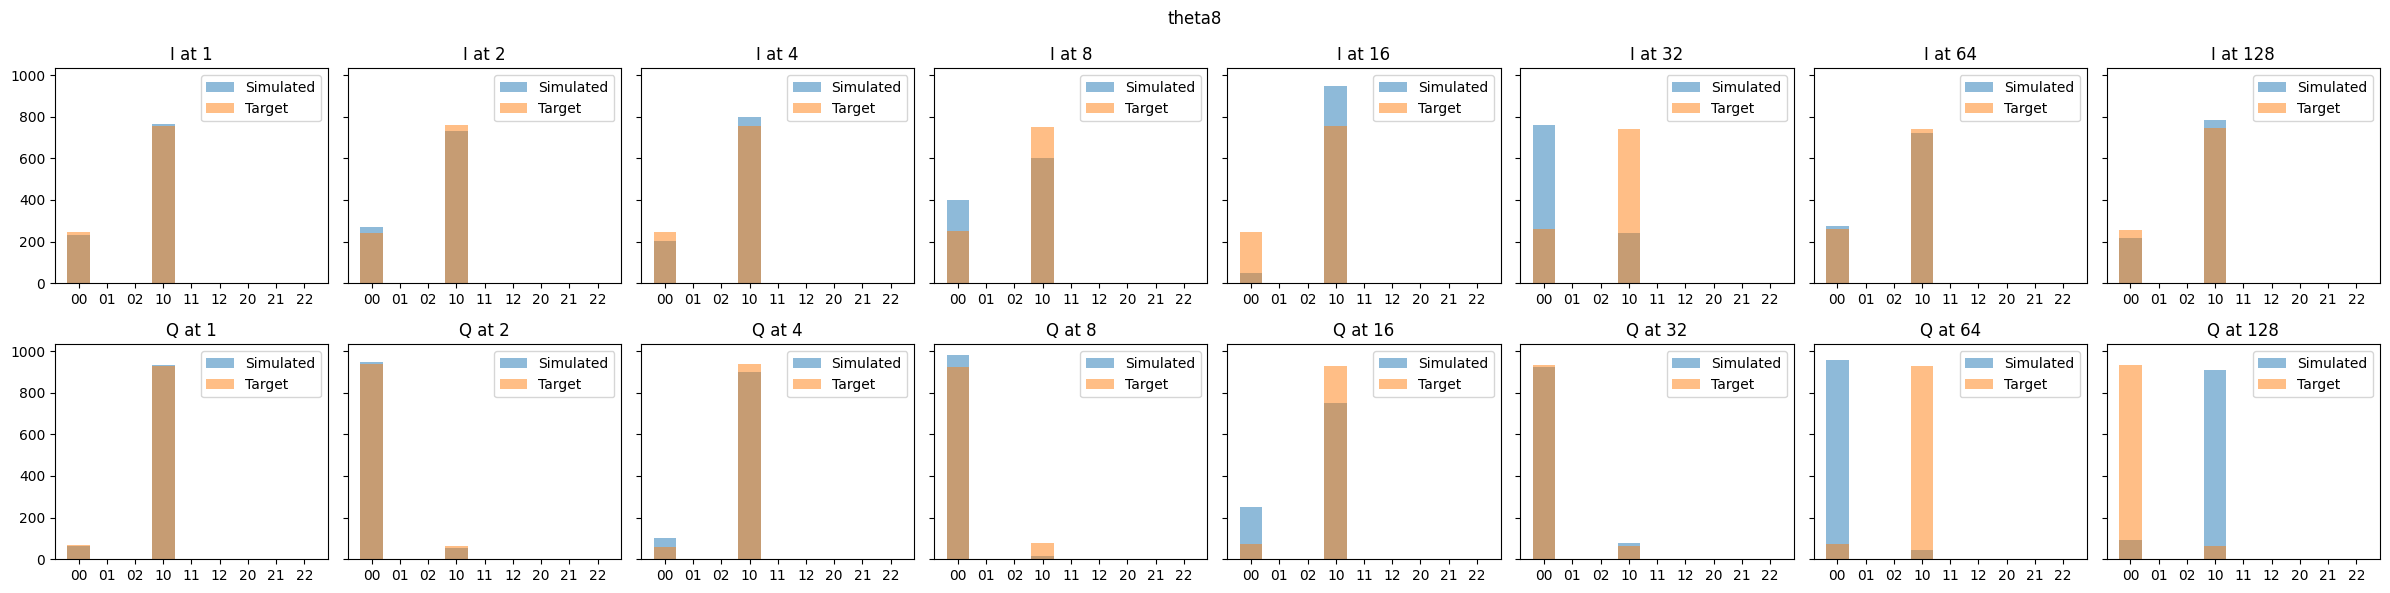

<Figure size 640x480 with 0 Axes>

In [670]:
estimator2.plot_all_outcomes(ds2_target)